# Olist dataset - e-commerce

### Importando bibliotecas
#### *Importing libraries*

In [306]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import datetime as dt
plt.style.use('ggplot')

df_olist=pd.read_csv('./datasets/olist_public_dataset_v2.csv')
df_olist_pay=pd.read_csv('./datasets/olist_public_dataset_v2_payments.csv')



###  1. Combinando datasets e corrigindo títulos de colunas
#### 1. *Combining datasets and correcting columns titles*

In [307]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100000 non-null  object 
 1   order_status                   100000 non-null  object 
 2   order_products_value           100000 non-null  float64
 3   order_freight_value            100000 non-null  float64
 4   order_items_qty                100000 non-null  int64  
 5   order_sellers_qty              100000 non-null  int64  
 6   order_purchase_timestamp       100000 non-null  object 
 7   order_aproved_at               99982 non-null   object 
 8   order_estimated_delivery_date  100000 non-null  object 
 9   order_delivered_customer_date  97595 non-null   object 
 10  customer_id                    100000 non-null  object 
 11  customer_city                  100000 non-null  object 
 12  customer_state                 

In [308]:
df_olist.columns

Index(['order_id', 'order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_aproved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_id', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_id', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [309]:
df_olist['order_purchase_timestamp'] = pd.to_datetime(df_olist['order_purchase_timestamp'])
df_olist['order_aproved_at'] = pd.to_datetime(df_olist['order_aproved_at'])
df_olist['order_estimated_delivery_date'] = pd.to_datetime(df_olist['order_estimated_delivery_date'])
df_olist['order_delivered_customer_date'] = pd.to_datetime(df_olist['order_delivered_customer_date'])
df_olist['review_creation_date'] = pd.to_datetime(df_olist['review_creation_date'])

df_olist['review_answer_timestamp'] = pd.to_datetime(df_olist['review_answer_timestamp'])


In [310]:
df_olist.rename(columns= {'order_aproved_at': 'order_approved_at','product_name_lenght': 'product_name_length', 'product_description_lenght':'product_description_length'}, inplace = True)

In [311]:
base_pt_en = pd.read_csv('./datasets/product_category_name_translation.csv')
base_pt_en_dic = dict(zip(base_pt_en['product_category_name'].tolist(),base_pt_en['product_category_name_english'].tolist()))
df_olist['categories_english'] = df_olist['product_category_name'].map(base_pt_en_dic)
df_olist['categories_english'] = df_olist['categories_english'].str.replace('_', " ")
df_olist['product_category_name'] = df_olist['product_category_name'].str.replace('_', " ")

In [312]:
df_olist.columns

Index(['order_id', 'order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_approved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_id', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_id', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'categories_english'],
      dtype='object')

In [313]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   order_id                       100000 non-null  object             
 1   order_status                   100000 non-null  object             
 2   order_products_value           100000 non-null  float64            
 3   order_freight_value            100000 non-null  float64            
 4   order_items_qty                100000 non-null  int64              
 5   order_sellers_qty              100000 non-null  int64              
 6   order_purchase_timestamp       100000 non-null  datetime64[ns]     
 7   order_approved_at              99982 non-null   datetime64[ns]     
 8   order_estimated_delivery_date  100000 non-null  datetime64[ns]     
 9   order_delivered_customer_date  97595 non-null   datetime64[ns]     
 10  customer_

In [314]:
df_olist_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104848 entries, 0 to 104847
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      104848 non-null  object 
 1   installments  104848 non-null  int64  
 2   sequential    104848 non-null  int64  
 3   payment_type  104848 non-null  object 
 4   value         104848 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [315]:
dict_order_installements= dict(zip(df_olist_pay['order_id'],df_olist_pay['installments']))


In [316]:
dict_order_payment_type= dict(zip(df_olist_pay['order_id'],df_olist_pay['payment_type']))


In [317]:
df_olist['installments'] = df_olist['order_id'].map(dict_order_installements)
df_olist['payment_type'] = df_olist['order_id'].map(dict_order_payment_type)
df_olist.columns


Index(['order_id', 'order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_approved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_id', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_id', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'categories_english',
       'installments', 'payment_type'],
      dtype='object')

In [318]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   order_id                       100000 non-null  object             
 1   order_status                   100000 non-null  object             
 2   order_products_value           100000 non-null  float64            
 3   order_freight_value            100000 non-null  float64            
 4   order_items_qty                100000 non-null  int64              
 5   order_sellers_qty              100000 non-null  int64              
 6   order_purchase_timestamp       100000 non-null  datetime64[ns]     
 7   order_approved_at              99982 non-null   datetime64[ns]     
 8   order_estimated_delivery_date  100000 non-null  datetime64[ns]     
 9   order_delivered_customer_date  97595 non-null   datetime64[ns]     
 10  customer_

In [319]:
df_olist['order_total_value'] = df_olist['order_products_value'].add(df_olist['order_freight_value'])



In [320]:
df_olist['time_buy_arrive'] = df_olist['order_delivered_customer_date'] - df_olist['order_approved_at']
df_olist['time_buy_arrive'] =(df_olist['time_buy_arrive']).dt.days


df_olist['time_expected_arrive'] = df_olist['order_estimated_delivery_date'] - df_olist['order_approved_at']
df_olist['time_expected_arrive'] =(df_olist['time_expected_arrive']).dt.days
df_olist['diff_real_est_arrival'] = df_olist['time_buy_arrive'] - df_olist['time_expected_arrive']
df_olist

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,...,review_comment_message,review_creation_date,review_answer_timestamp,categories_english,installments,payment_type,order_total_value,time_buy_arrive,time_expected_arrive,diff_real_est_arrival
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15,2017-02-06 11:04:24.154259,...,NaN,2017-02-07,2017-02-09 02:37:37+00:00,health beauty,1.0,boleto,363.74,5.0,41.0,-36.0
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,2017-10-02,2017-09-13 20:17:41.296915,...,entrega em 2 dias produto c boa qualidade otim...,2017-09-14,2017-09-15 03:43:47+00:00,computers accessories,1.0,credit_card,30.10,3.0,21.0,-18.0
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,2017-03-07,2017-02-06 15:43:04.758566,...,produto veio antes do prazo informado muito ob...,2017-02-07,2017-02-10 14:18:53+00:00,auto,10.0,credit_card,256.90,6.0,35.0,-29.0
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,2018-04-03,2018-04-03 20:36:43.778451,...,NaN,2018-04-04,2018-04-05 02:52:31+00:00,bed bath table,4.0,credit_card,48.22,23.0,22.0,1.0
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,2017-05-24,2017-05-04 18:47:45.721758,...,NaN,2017-05-05,2017-05-08 15:20:18+00:00,furniture decor,1.0,boleto,343.64,9.0,28.0,-19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5e0fb4a48b36946c8121f9e03964d9c2,delivered,198.00,91.98,2,1,2017-10-02 20:19:43,2017-10-04 02:43:52.408623,2017-10-31,2017-10-11 16:25:47.945541,...,show,2017-10-12,2017-10-12 19:53:25+00:00,garden tools,1.0,boleto,289.98,7.0,26.0,-19.0
99996,138d22c05c5e456f19bdc7dcf09b89aa,delivered,59.00,11.02,1,1,2017-03-22 06:13:55,2017-03-22 06:13:55.000000,2017-04-10,2017-03-31 13:23:12.316309,...,NaN,2017-04-01,2017-04-04 04:42:58+00:00,telephony,1.0,credit_card,70.02,9.0,18.0,-9.0
99997,a97f1478d7e7648bf5bd2af02d1392a7,delivered,119.99,18.09,1,1,2017-06-10 20:12:12,2017-06-10 21:32:48.260831,2017-07-05,2017-06-24 07:26:42.947365,...,recomendo,2017-06-25,2017-06-27 22:11:50+00:00,sports leisure,3.0,credit_card,138.08,13.0,24.0,-11.0
99998,7212b1926de631a35211dd5b4bd9d77b,delivered,119.99,18.09,1,1,2017-09-12 10:24:08,2017-09-12 10:35:15.542788,2017-10-02,2017-09-19 22:51:55.417806,...,NaN,2017-09-20,2017-09-25 21:22:57+00:00,cool stuff,1.0,voucher,138.08,7.0,19.0,-12.0


In [321]:
order_status = df_olist['order_status'].unique()
order_status

array(['delivered', 'canceled', 'shipped', 'invoiced', 'processing',
       'unavailable', 'approved'], dtype=object)

### 1.1 Analisando categorias de produtos

### *1.1 Analysing product categories*





In [322]:
product_category = df_olist['product_category_name'].unique()
product_category = product_category.tolist()
product_category.sort()
product_category
len(product_category)

71

### 1.1.1 Verificando diferenças entre 'casa_conforto' e 'casa_conforto_2' & 'eletrodomesticos' e 'eletrodomesticos_2'

### 1.1.1 *Verifying diferences between 'casa_conforto' and 'casa_conforto_2' & between 'eletrodomesticos' and 'eletrodomesticos_2'*

In [323]:
df_casa_conforto2 = df_olist[df_olist['product_category_name'].isin(['casa_conforto_2','casa_conforto'])]

sns.boxplot(data=df_casa_conforto2, y= 'order_total_value', x='product_category_name')




ValueError: min() arg is an empty sequence

In [324]:
len(df_olist[df_olist['product_category_name']=='casa_conforto']['product_id'].unique())

0

In [325]:
len(df_olist[df_olist['product_category_name']=='casa_conforto_2']['product_id'].unique())

0

In [326]:
len(df_olist[df_olist['product_category_name']=='eletrodomesticos']['product_id'].unique())

423

In [327]:
len(df_olist[df_olist['product_category_name']=='eletrodomesticos_2']['product_id'].tolist())

0

<AxesSubplot:xlabel='product_category_name', ylabel='order_total_value'>

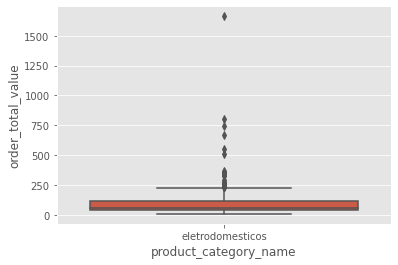

In [328]:

df_eletro = df_olist[df_olist['product_category_name'].isin(['eletrodomesticos','eletrodomesticos_2'])]

sns.boxplot(data=df_eletro, y= 'order_total_value', x='product_category_name')

In [329]:

df_olist['product_category_name'] = df_olist['product_category_name'].str.replace('_', ' ').str.lower()
df_olist['product_category_name'].head()


0              beleza saude
1    informatica acessorios
2                automotivo
3           cama mesa banho
4          moveis decoracao
Name: product_category_name, dtype: object

In [330]:
#capitalize first character of each word
df_olist['customer_city'] = df_olist['customer_city'].str.title()
df_olist['customer_state'] = df_olist['customer_state'].str.upper()
df_olist['customer_state'].value_counts().head(7)

SP    41020
RJ    13486
MG    11977
RS     5586
PR     5027
SC     3747
BA     3459
Name: customer_state, dtype: int64

### <span style =' color:#FCA311'>  1.1.3 CONCLUSAO DA ANALISE DO NOME DAS CATEGORIAS DE PRODUTOS </span>

### Há diferença entre valores e quantidades de itens únicos entre as categorias 'casa_conforto' e 'casa_conforto_2' & 'eletrodomesticos' e 'eletrodomesticos_2'

### <span style =' color:#FCA311'>*1.1.3 CONCLUSION REGARDING PRODUCT NAME CATEGORY ANALISYS* </span>

### *There are differecences between 'casa_conforto' and 'casa_conforto_2' & between 'eletrodomesticos' and 'eletrodomesticos_2'*

## <span style =' color:#ffe200'>  2. VISUALIZAÇÃO DE DADOS - EDA
## <span style =' color:#ffe200'>*2. DATA VISUALIZATION - EDA*

### <span style =' color:#FCA311'>  2.1 VENDAS </span>
### <span style =' color:#FCA311'>*2.1 SALES*</span>

### 2.1.1 Faturamento por estado

### 2.1.1 *Revenue by state*

In [331]:
pd.pivot_table(data=df_olist, values='order_total_value',
               index='customer_state', aggfunc=sum).sort_values(by='order_total_value',ascending=False)

,order_total_value
customer_state,
SP,5531820.39
RJ,2091366.68
MG,1761858.48
RS,869553.97
PR,764372.84
BA,602405.01
SC,587859.93
GO,329294.42
DF,325533.52


### 2.1.2 Faturamento por categoria de produto

### 2.1.2 *Revenue by product category*

In [332]:
pd.pivot_table(data=df_olist, values='order_products_value',
               index='product_category_name', aggfunc=sum).sort_values(by='order_products_value',ascending=False)

,order_products_value
product_category_name,
relogios presentes,1337041.00
beleza saude,1081665.93
cama mesa banho,1056703.34
esporte lazer,961111.91
informatica acessorios,859228.95
...,...
cds dvds musicais,730.00
flores,679.20
fraldas higiene,509.00


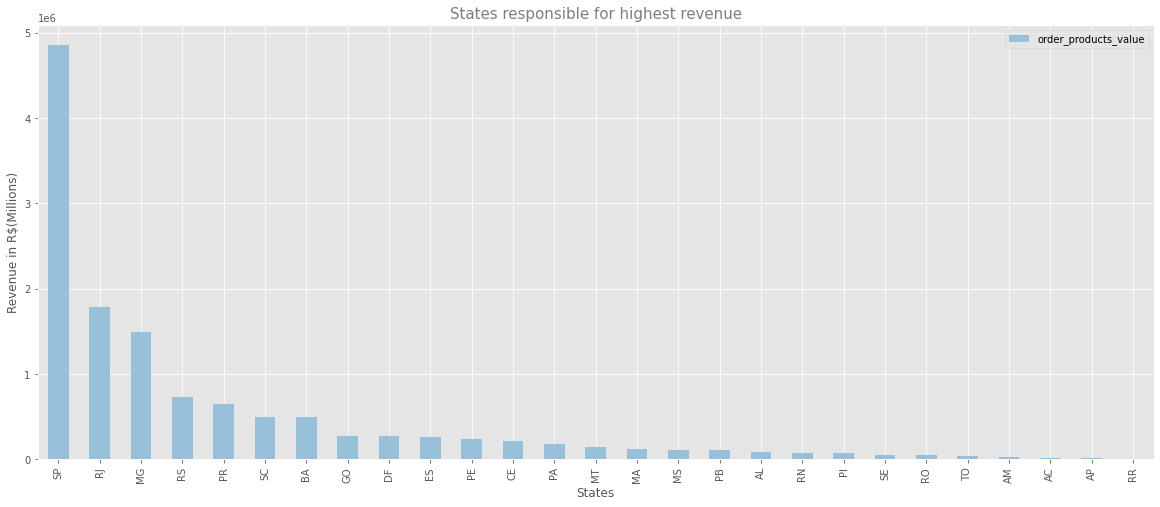

In [333]:
df_olist.groupby(df_olist['customer_state'])['order_products_value'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),color='#98c1d9')
plt.title('States responsible for highest revenue', size=15, color='#7e7e7e')
plt.ylabel('Revenue in R$(Millions)')
plt.xlabel('States')
plt.legend()
plt.show()

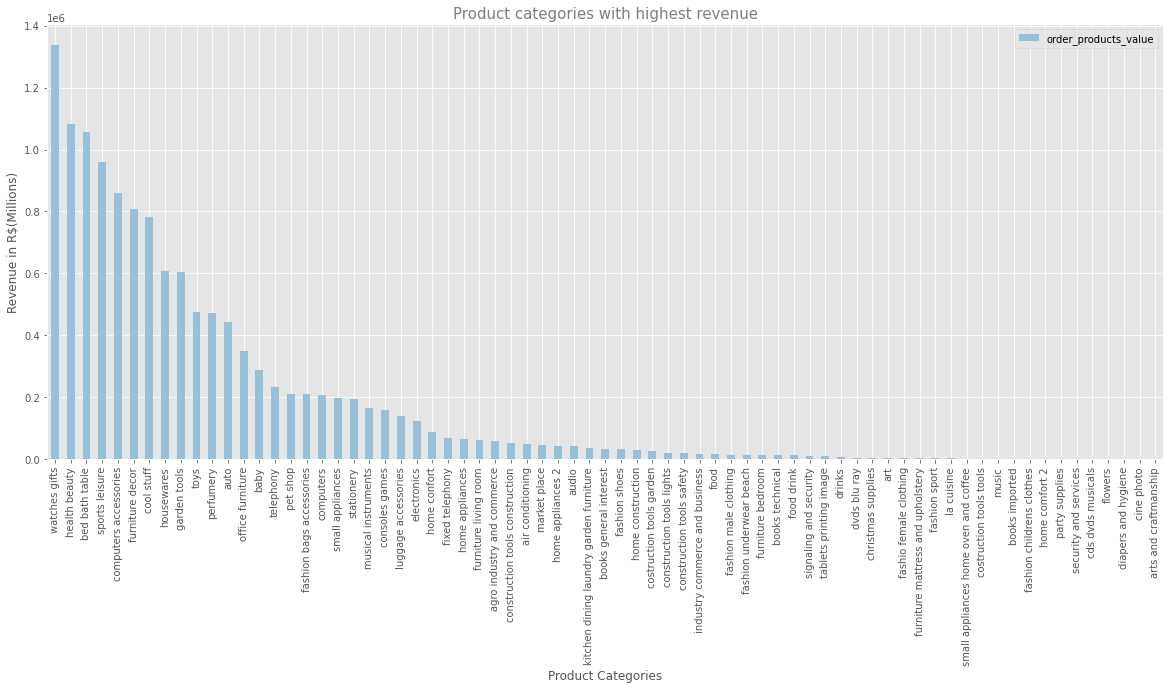

In [334]:
df_olist.groupby(df_olist['categories_english'])['order_products_value'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),color='#98c1d9')
plt.title('Product categories with highest revenue', size=15, color='#7e7e7e')
plt.ylabel('Revenue in R$(Millions)')
plt.xlabel('Product Categories')
plt.legend()
plt.show()

In [335]:
teste= df_olist.groupby('product_category_name')['order_total_value']
teste

In [336]:
df_olist['order_total_value'].describe()

count    100000.000000
mean        150.930905
std         203.896164
min           7.430000
25%          61.980000
50%         101.780000
75%         169.110000
max       13664.080000
Name: order_total_value, dtype: float64

Order mean value R$ 150.93
Median order value R$ 101.78


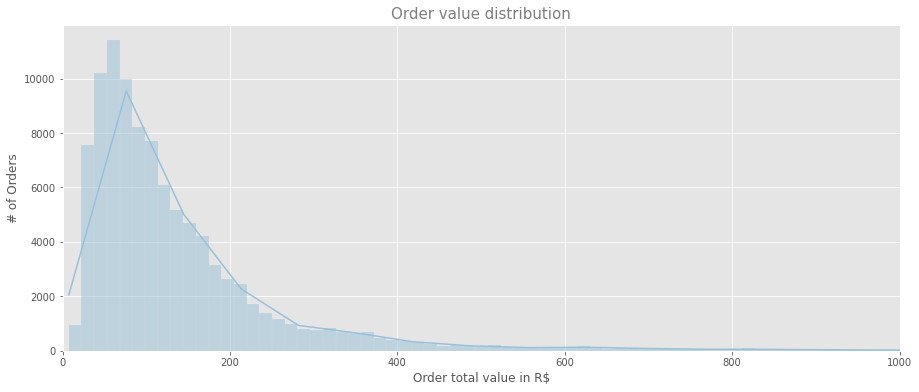

In [337]:
plt.figure(figsize=(15,6))
plt.title('Order value distribution', size=15, color='#7e7e7e')
plt.xlabel('Order total value in R$')
plt.ylabel('# of Orders')
sns.histplot(df_olist['order_total_value'], bins=900 ,kde=True, color='#98c1d9')
plt.xlim([0, 1000])
preco_medio = round(df_olist['order_total_value'].mean(),2)
preco_mediano = round(df_olist['order_total_value'].median(),2)
print(f'Order mean value R$ {preco_medio}')
print(f'Median order value R$ {preco_mediano}')

#### O gráfico acima demonstra uma distribuição assimétrica em relação aos valores das compras

#### *The chart below shows us a assymetrical distribution regarding order value*

### Analise Horário de Compras

### *Purchasing hour analysis*

<AxesSubplot:title={'center':'Purchasing hour'}, xlabel='purchase moment', ylabel='# of Orders across the day'>

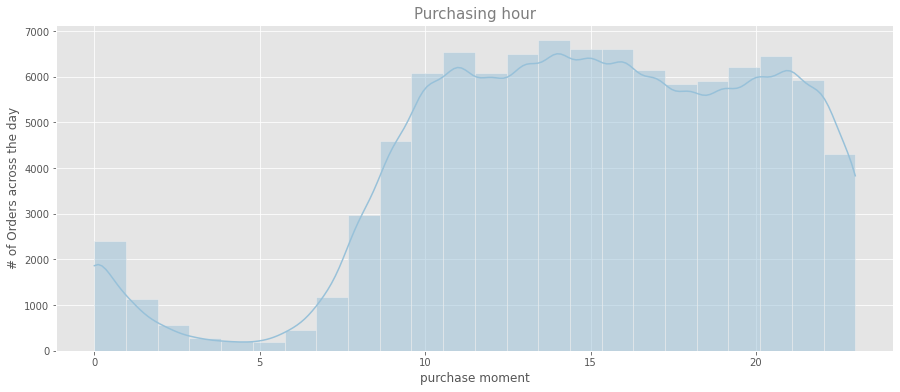

In [338]:
df_olist['purchase_hour'] = df_olist['order_purchase_timestamp'].dt.hour
plt.figure(figsize=(15,6))
plt.title('Purchasing hour', size=15, color='#7e7e7e')
plt.xlabel('purchase moment')
plt.ylabel('# of Orders across the day')
sns.histplot(df_olist['purchase_hour'],kde=True, bins=24, color='#98c1d9')



In [339]:
df_olist['purchase_hour'].describe()

count    100000.000000
mean         14.822790
std           5.330297
min           0.000000
25%          11.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: purchase_hour, dtype: float64

#### Maior parte dos clientes compra durante o horário comercial
#### *Majority of customers usually buy during business hours*

### 2.1.3 Análise das formas de pagamento

### 2.1.3 *Payment methods analysis*

<AxesSubplot:ylabel='payment_type'>

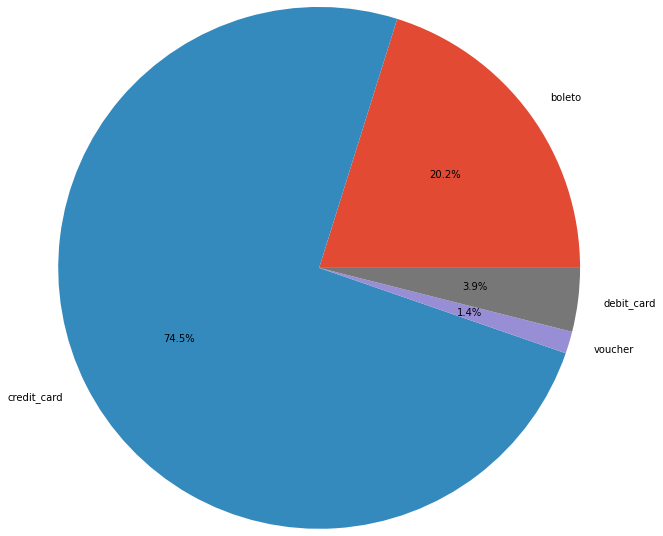

In [340]:

df_olist['payment_type'].groupby(df_olist['payment_type']).count().plot(kind='pie',radius=3,labels=df_olist.payment_type.unique(),autopct='%.1f%%')


#### Mais de 90% dos pedidos foram pagos por crédito ou boleto como forma de pagamento

#### Over 90% of of total order were paid by credit card or boletos. 

In [341]:
grouped_states = (df_olist.groupby('customer_state')[['order_products_value']]
                            .agg({'order_products_value':['median', 'count']})).sort_values(by=('order_products_value','median'), ascending=False)

grouped_states

order_products_value       
                             median  count
customer_state                            
PB                          109.990    542
TO                          109.000    261
PI                           99.900    454
PA                           99.900   1023
AP                           99.900     68
SE                           99.000    339
RO                           99.000    287
AL                           99.000    440
MA                           98.000    763
RN                           98.000    519
RR                           97.450     46
AM                           94.900    156
CE                           93.000   1327
PE                           91.400   1638
AC                           89.945     86
MT                           89.900    922
RJ                           89.900  13486
BA                           89.900   3459
GO                           89.800   2011
MS                           89.000    725
ES                           88.045   2040
SC                           87.900   3747
RS                           85.945   5586
MG                           84.900  11977
DF                           82.990   2051
PR                           80.000   5027
SP                           78.000  41020

In [342]:
region_dict = {'RS':'South',
               'SC':'South',
               'PR':'South',
               'SP':'Southeast',
               'RJ':'Southeast',
               'ES':'Southeast',
               'MG':'Southeast',
               'DF': 'Midwest',
               'GO':'Midwest',
               'MT':'Midwest',
               'MS': 'Midwest',
               'BA': 'Northeast',
               'SE': 'Northeast',
               'AL': 'Northeast',
               'PE': 'Northeast',
               'PB': 'Northeast',
               'RN': 'Northeast',
               'CE': 'Northeast',
               'PI': 'Northeast',
               'MA': 'Northeast',
               'TO': 'North',
               'PA': 'North',
               'AP': 'North',
               'AM': 'North',
               'AC': 'North',
               'RO': 'North',
               'RR': 'North',  
            }

In [343]:
df_olist['region'] = df_olist['customer_state'].map(region_dict)

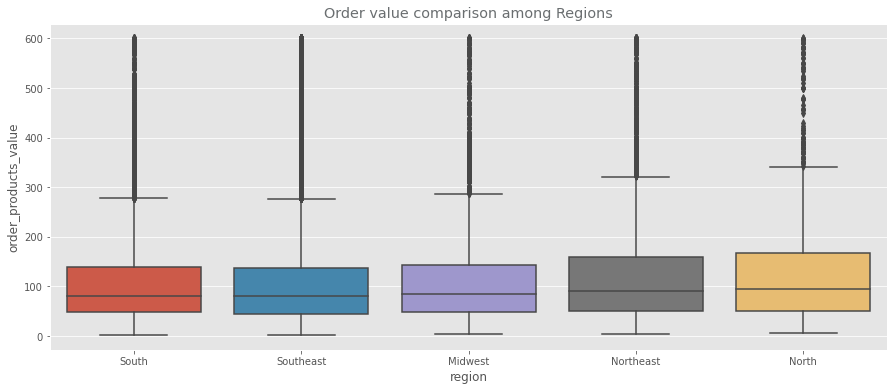

In [344]:
plt.figure(figsize=(15,6))
plt.title('Order value comparison among Regions', color='#6a6e70')
sns.boxplot(data=df_olist[df_olist['order_products_value']<=600], y='order_products_value', x='region')
plt.show()

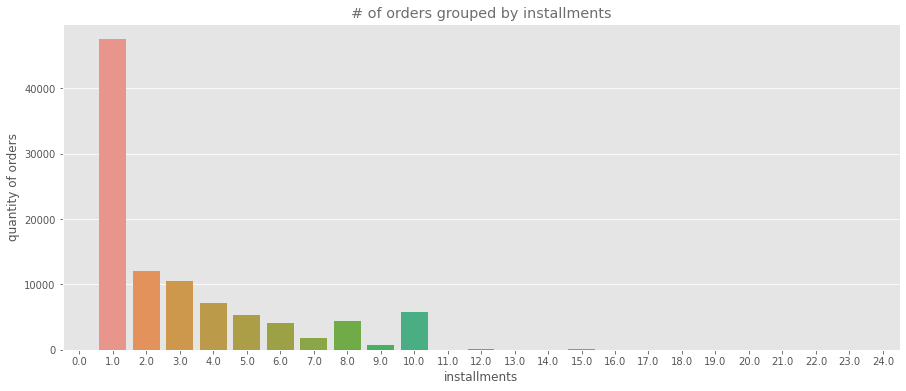

In [345]:

num_installments= df_olist['installments']
plt.figure(figsize=(15,6))
sns.countplot(x=num_installments)
plt.title('# of orders grouped by installments', color='#6a6e70')
plt.ylabel('quantity of orders')
plt.show()




In [346]:
grouped_installments = (df_olist.groupby('installments')[['order_products_value']]
                            .agg({'order_products_value':['median', 'count', 'mean','max','min']})).sort_values(by=('order_products_value','median'), ascending=False)

grouped_installments

order_products_value                                     
                           median  count        mean       max     min
installments                                                          
24.0                      457.000     25  501.768800   1999.90   69.99
20.0                      264.945     14  402.927143   1200.00   44.90
15.0                      230.900     79  381.951519   3599.00   51.90
18.0                      230.000     31  419.612903   1599.99   35.90
23.0                      216.000      1  216.000000    216.00  216.00
22.0                      194.895      2  194.895000    209.99  179.80
10.0                      179.990   5803  312.364208   9798.00    7.80
8.0                       169.000   4392  248.713472   6735.00    9.99
19.0                      159.900      3  163.293333    184.99  144.99
21.0                      157.495      2  157.495000    165.00  149.99
17.0                      151.000      4  147.625000    155.50  133.00
16.0                      148.000      8  161.450000    285.00  129.90
12.0                      139.800    143  245.954895   2399.90   34.90
14.0                      125.450     14  143.927857    399.90   58.67
13.0                      110.000     16  115.386250    259.99   10.90
6.0                       110.000   4109  164.169942   3899.70   12.17
5.0                        99.900   5365  145.911545   4599.90    8.03
11.0                       97.400     35  106.852571    369.00   24.90
4.0                        92.000   7232  132.839403   2999.99    6.98
7.0                        89.990   1782  142.536448   1597.35    8.90
3.0                        88.000  10593  114.884234   2299.95    3.82
2.0                        86.900  12091  101.949429   1589.96    3.49
9.0                        84.990    704  147.141037   1359.00   16.90
0.0                        64.640      2   64.640000     83.38   45.90
1.0                        59.990  47548   98.444701  13440.00    2.00

### 2.1.4 Análises de pedidos diários

### 2.1.4 *Daily Orders analysis*

In [376]:
order_daily = df_olist[['order_approved_at']].groupby(df_olist['order_approved_at'].dt.dayofweek.sort_index()).count()
order_daily

,order_approved_at
order_approved_at,
0.0,12842
1.0,19250
2.0,15885
3.0,15326
4.0,14747
5.0,12535
6.0,9397


In [378]:
daily_trend_index = order_daily.rename(columns = {'order_approved_at': 'num_of_orders'})
daily_trend = daily_trend_index.reset_index()
daily_trend

,order_approved_at,num_of_orders
0,0.0,12842
1,1.0,19250
2,2.0,15885
3,3.0,15326
4,4.0,14747
5,5.0,12535
6,6.0,9397


In [ ]:
day_map = { 0:'Monday',
           1:'Tuesday',
           2:'Wednesday',
           3:'Thursday',
           4:'Friday',
           5:'Saturday',
           6:'Sunday', 
}

### <span style =' color:#FCA311'>2.2 Análise da avaliação do consumidor </span>
### <span style =' color:#FCA311'> *2.2 Customer review analysis* </span>


### 2.2.1 Avaliacao notas por categoria - Produtos com menor nota

### 2.2.1 *Customer rate by category* - Products with lowest score



In [349]:
df_olist.columns

Index(['order_id', 'order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_approved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_id', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_id', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'categories_english',
       'installments', 'payment_type', 'order_total_value', 'time_buy_arrive',
       'time_expected_arrive', 'diff_real_est_arrival', 'purchase_hour',
       'region'],
      dtype='object')

In [354]:
# creating an aggregation
avg_score_per_category = df_olist.groupby('categories_english', as_index=False).agg({'review_score': ['count', 'mean', 'median']})
avg_score_per_category.columns = ['categories_english', 'count', 'mean', 'median']
avg_score_per_category = avg_score_per_category[avg_score_per_category['count'] > 50]
avg_score_per_category = avg_score_per_category.sort_values(by='mean', ascending=False)
avg_score_per_category

,categories_english,count,mean,median
8,books general interest,436,4.454128,5.0
2,art,88,4.420455,5.0
10,books technical,113,4.380531,5.0
37,food drink,243,4.362140,5.0
53,luggage accessories,1059,4.318225,5.0
38,furniture bedroom,59,4.288136,5.0
0,agro industry and commerce,118,4.237288,5.0
14,computers,144,4.215278,5.0
45,home appliances 2,172,4.203488,5.0
31,fashion shoes,375,4.200000,5.0


### 2.2.2 Agrupando pontuação de revisões por pontos

### 2.2.2 *Grouping review results by score*

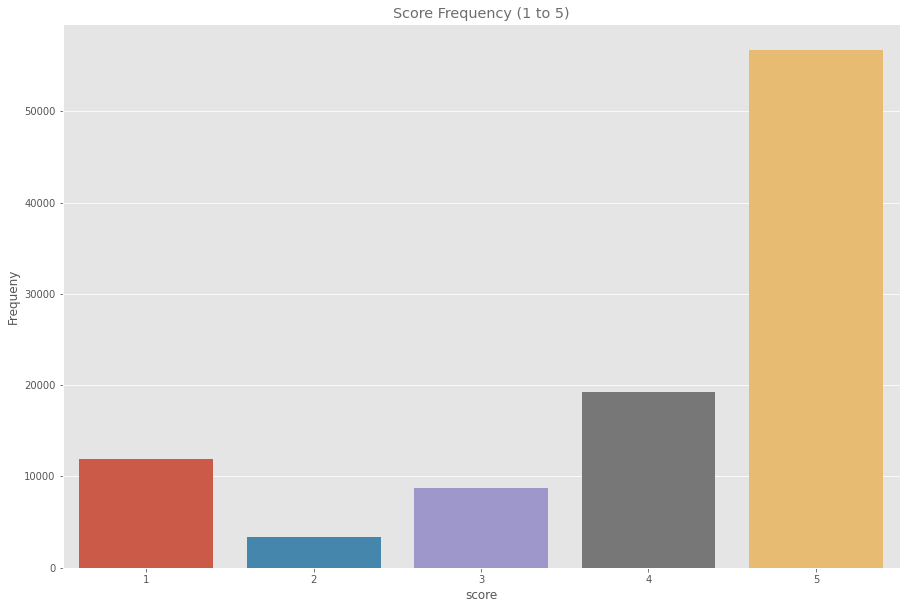

In [367]:
scores = pd.DataFrame(df_olist['review_score'].value_counts())

# reseting index to manipulate created df

scores.reset_index(inplace=True)
plt.figure(figsize=(15,10))
sns.barplot(data=scores, x='index', y='review_score')
plt.title('Score Frequency (1 to 5)', color='#6a6e70')
plt.ylabel('Frequeny')
plt.xlabel('score')
plt.show()

